<a href="https://colab.research.google.com/github/Jesus-Manuel-Huerta-Najera/Titanic/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **4.2 Metricas de evaluación (Titanic)**

**Datos**

Jesus Manuel Huerta Najera

Matrícula: 1718110393

Grupo: IDGS91


**Conclusión** 

Dentro del desarrollo de la actividad, logre entender con mayor claridad lo que es una matriz de confusión y la explicación sobre la obtención de los diferentes datos, como es la precisión, me pareció muy interesante porque a veces estamos acostumbrados a solo ejecutar métodos y no sabemos en realidad que estamos haciendo, es decir que desconocemos el trabajo que hay detrás de cada método.

**Importar matriculas:**

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
%load_ext tensorboard

from sklearn.linear_model import  LogisticRegression
from sklearn.model_selection import  train_test_split

from sklearn.metrics import  accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import  plot_confusion_matrix, confusion_matrix

pd.options.display.max_columns = 4


# Dataset

In [2]:
df =  pd.read_csv("titanic.csv")

# Analizar el dataframe

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Survived          887 non-null    int64  
 1   Pclass            887 non-null    int64  
 2   Sex               887 non-null    object 
 3   Age               887 non-null    float64
 4   Siblings/Spouses  887 non-null    int64  
 5   Parents/Children  887 non-null    int64  
 6   Fare              887 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.6+ KB


In [4]:
df.head()

,Survived,Pclass,...,Parents/Children,Fare
0,0,3,...,0,7.2500
1,1,1,...,0,71.2833
2,1,3,...,0,7.9250
3,1,1,...,0,53.1000
4,0,3,...,0,8.0500


In [5]:
df.describe()

,Survived,Pclass,...,Parents/Children,Fare
count,887.000000,887.000000,...,887.000000,887.00000
mean,0.385569,2.305524,...,0.383315,32.30542
std,0.487004,0.836662,...,0.807466,49.78204
min,0.000000,1.000000,...,0.000000,0.00000
25%,0.000000,2.000000,...,0.000000,7.92500
50%,0.000000,3.000000,...,0.000000,14.45420
75%,1.000000,3.000000,...,0.000000,31.13750
max,1.000000,3.000000,...,6.000000,512.32920


**Crear una columna**

In [6]:
df['Male'] = df['Sex'] == 'male'
df.head()

,Survived,Pclass,...,Fare,Male
0,0,3,...,7.2500,True
1,1,1,...,71.2833,False
2,1,3,...,7.9250,False
3,1,1,...,53.1000,False
4,0,3,...,8.0500,True


In [7]:
df['Male'].sum()

573

**Scatter plot**

Text(0, 0.5, 'Age')

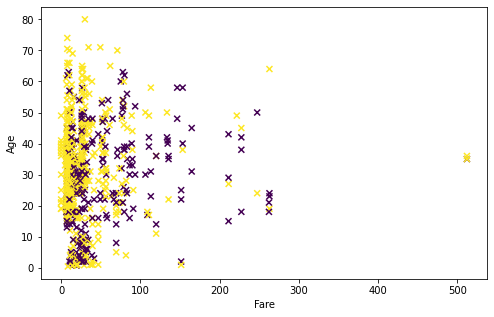

In [8]:
plt.figure(figsize=(8,5))
plt.scatter(df['Fare'],df['Age'],c=df['Male'],marker="x")
plt.xlabel('Fare')
plt.ylabel('Age')

**Separar caracteristicas y objetivo**

In [9]:
xs = df[['Pclass','Age','Siblings/Spouses','Parents/Children','Fare','Male']]
xs

,Pclass,Age,...,Fare,Male
0,3,22.0,...,7.2500,True
1,1,38.0,...,71.2833,False
2,3,26.0,...,7.9250,False
3,1,35.0,...,53.1000,False
4,3,35.0,...,8.0500,True
...,...,...,...,...,...
882,2,27.0,...,13.0000,True
883,1,19.0,...,30.0000,False
884,3,7.0,...,23.4500,False
885,1,26.0,...,30.0000,True


In [10]:
x = df[['Pclass','Age','Siblings/Spouses','Parents/Children','Fare','Male']].values
y = df['Survived'].values

In [11]:
x

array([[3, 22.0, 1, 0, 7.25, True],
       [1, 38.0, 1, 0, 71.2833, False],
       [3, 26.0, 0, 0, 7.925, False],
       ...,
       [3, 7.0, 1, 2, 23.45, False],
       [1, 26.0, 0, 0, 30.0, True],
       [3, 32.0, 0, 0, 7.75, True]], dtype=object)

**Configurar modelo**

In [12]:
model = LogisticRegression()

**Dividir en train y test**

In [13]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=124)

**Entrenar**

In [14]:
model.fit(x_train,y_train)

LogisticRegression()

**Predicciones**

In [15]:
y_pred= model.predict(x_test)

**Analizar las predicciones**

In [16]:
x_test.shape

(178, 6)

In [17]:
x_test[0:3]

array([[3, 4.0, 4, 1, 29.125, True],
       [3, 21.0, 0, 0, 7.925, True],
       [1, 45.0, 0, 0, 26.55, True]], dtype=object)

In [18]:
y_test[0:3]

array([0, 0, 0])

In [19]:
y_pred[0:3]

array([0, 0, 0])

**Probabilidad**

In [20]:
model.predict_proba(x_test)[5,0]

0.5459900061811389

In [21]:
model.predict_proba(x_test)[5,1]

0.45400999381886115

In [22]:
y.shape - y.sum()#personas que no sobrevivieron

array([545])

In [23]:
y.sum()#personas que sobrevivieron

342

**Metricas**

Accuracy = numero de prediccion correcta / total de predicciones

In [24]:
y_pred == y_test

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
        True, False, False,  True, False,  True,  True, False,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True, False,  True, False,  True, False, False,
        True, False, False,  True,  True,  True,  True,  True, False,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True, False,

In [25]:
(y_pred == y_test).sum() #predicciones correctas

141

In [26]:
accuracy = (y_pred == y_test).sum() / y_test.shape
accuracy

array([0.79213483])

**Matriz de confusion**

In [27]:
confusion_matrix(y_test,y_pred)  

array([[100,  19],
       [ 18,  41]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


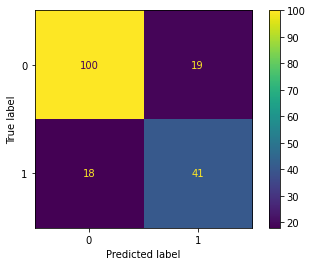

In [35]:
labels = ['Not surived', 'Survived']
plot_confusion_matrix(model,x_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


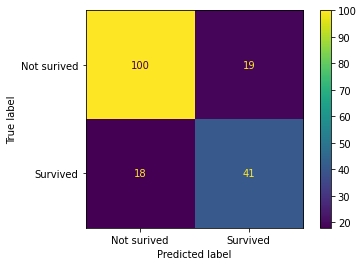

In [57]:
labels = ['Not surived', 'Survived']
plot_confusion_matrix(model,x_test,y_test, display_labels=labels)

In [36]:
print(classification_report(y_test,y_pred, target_names=labels))

              precision    recall  f1-score   support

 Not surived       0.85      0.84      0.84       119
    Survived       0.68      0.69      0.69        59

    accuracy                           0.79       178
   macro avg       0.77      0.77      0.77       178
weighted avg       0.79      0.79      0.79       178



**Accuracy de la confusion matrix**

accuracy = suma de predicciones correctas  /  total de predicciones

In [45]:
accuracy = (y_pred == y_test).sum() / y_test.shape
accuracy

array([0.79213483])

In [44]:
accuracy = (100 + 41) / (100 + 41 +19 + 18)
accuracy

0.7921348314606742

**Precision**

¿Que proporcion de identificaciones positivas fue realmente correcta?

precision = positivos predichos / predicciones positivas

In [58]:
precision = 41 / (41 + 19)
precision

0.6833333333333333

**Recall**

¿Que proporcion de positivos reales se identifico correctamente?

recall = True positive / (True positive + False negative)

In [48]:
recall = 41 / (41 + 18)
recall

0.6949152542372882

**F1 score**

es el promedio de precision y recall

f1_score = 2 * ((precision * recall)/(precision + recall))

In [60]:
f1 = 2 * ((precision * recall) / (precision + recall))
f1

0.6890756302521008

**Skylearn Metrics**

In [53]:
print("Accuracuy: {} : {}".format(accuracy,accuracy_score(y_test,y_pred)))

Accuracuy: [0.79213483] : 0.7921348314606742


In [59]:
print("Precision: {} : {}".format(precision,precision_score(y_test,y_pred)))

Precision: 0.6833333333333333 : 0.6833333333333333


In [55]:
print("Recall: {} : {}".format(recall,recall_score(y_test,y_pred)))

Recall: 0.6949152542372882 : 0.6949152542372882


In [61]:
print("F1 Score: {} : {}".format(f1,f1_score(y_test,y_pred)))

F1 Score: 0.6890756302521008 : 0.6890756302521008


**Cambiar el umbral(threshold)**

In [67]:
y_pred =  model.predict_proba(x_test)[:,1] >0.75

In [68]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.97      0.87       119
           1       0.90      0.46      0.61        59

    accuracy                           0.80       178
   macro avg       0.84      0.72      0.74       178
weighted avg       0.82      0.80      0.78       178

